# DICOM SEG

This example demonstrates how to read DICOM CT volumes with and DICOM SEG, AI-generated segmentations, with [ITK-Wasm](https://wasm.itk.org). Data is pulled from the [NIH Imaging Data Commons (IDC)](https://portal.imaging.datacommons.cancer.go).

You can run this notebook locally or with any of the following platforms: 
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itkwasm/DICOM_SEG.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitkwasm%2FDICOM_SEG.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itkwasm/DICOM_SEG.ipynb)

In [ ]:
import sys

!{sys.executable} -m pip install -q "itkwidgets[all]>=1.0a49" rich s5cmd itkwasm-dicom

In [2]:
from pathlib import Path
import glob
from itkwidgets import view
from itkwasm_dicom import read_segmentation, read_image_dicom_file_series
import numpy as np
from rich import print

## Segmentation of lung cancer from CT series

In [3]:
%%capture
# CT series downloaded from TCIA / IDC, NSCLC Radiogenomics collection, https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/#citations
# Bakr, S., Gevaert, O., Echegaray, S., Ayers, K., Zhou, M., Shafiq, M., Zheng, H., Zhang, W., Leung, A., Kadoch, M., Shrager, J., Quon, A., Rubin, D., Plevritis, S., & Napel, S. (2017). Data for NSCLC Radiogenomics (Version 4) [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2017.7hs46erv
!s5cmd --no-sign-request --endpoint-url https://s3.amazonaws.com cp "s3://idc-open-data/d3d3f9a5-c90a-4763-9a4b-089aab391438/*" CT_DICOM_series

# Segmentation of this series downloaded from TCIA, IDC, BAMF under the AIMI Annotations initiative (https://zenodo.org/doi/10.5281/zenodo.8345959)
!s5cmd --no-sign-request --endpoint-url https://s3.amazonaws.com cp "s3://idc-open-data/410e0c21-29e1-45e2-9c6b-15ae592e571b/*" SEG_DICOM_series

In [4]:
ct_image_files = glob.glob('CT_DICOM_series/*')
ct_image, sorted_file_names = read_image_dicom_file_series(ct_image_files)

In [13]:
seg_file_name = glob.glob('./SEG_DICOM_series/*.dcm')[0]
seg_image, seg_info = read_segmentation(seg_file_name)

Row direction: 1 0 0
Col direction: 0 1 0
Z direction: 0 0 1
Total frames: 126
Total frames with unique IPP: 76
Total overlapping frames: 50
Origin: [-348.177, -348.177, -442.83]
Slice extent: 245.25
Slice spacing: 3.26999
Image Orientation Patient set to : 1, 0, 0, 0, 1, 0
Identified 1 groups of non-overlapping segments



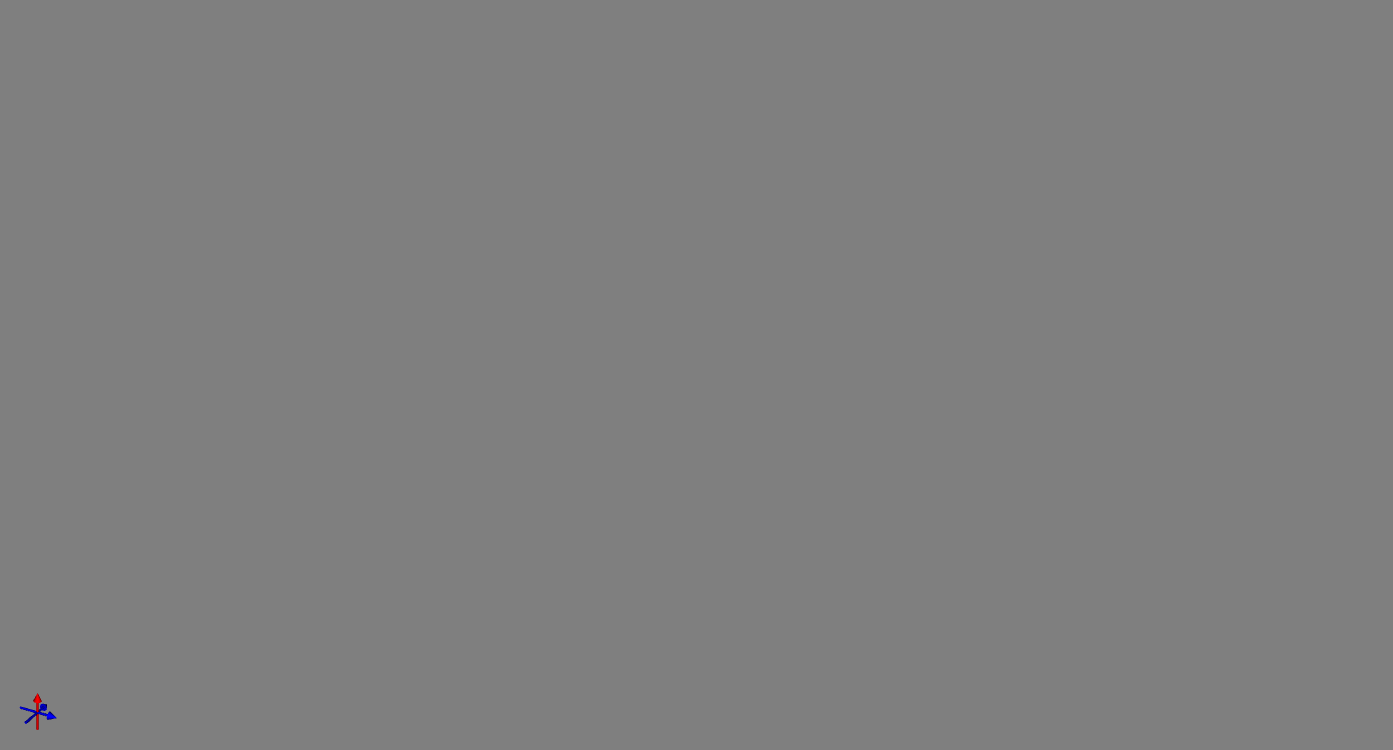
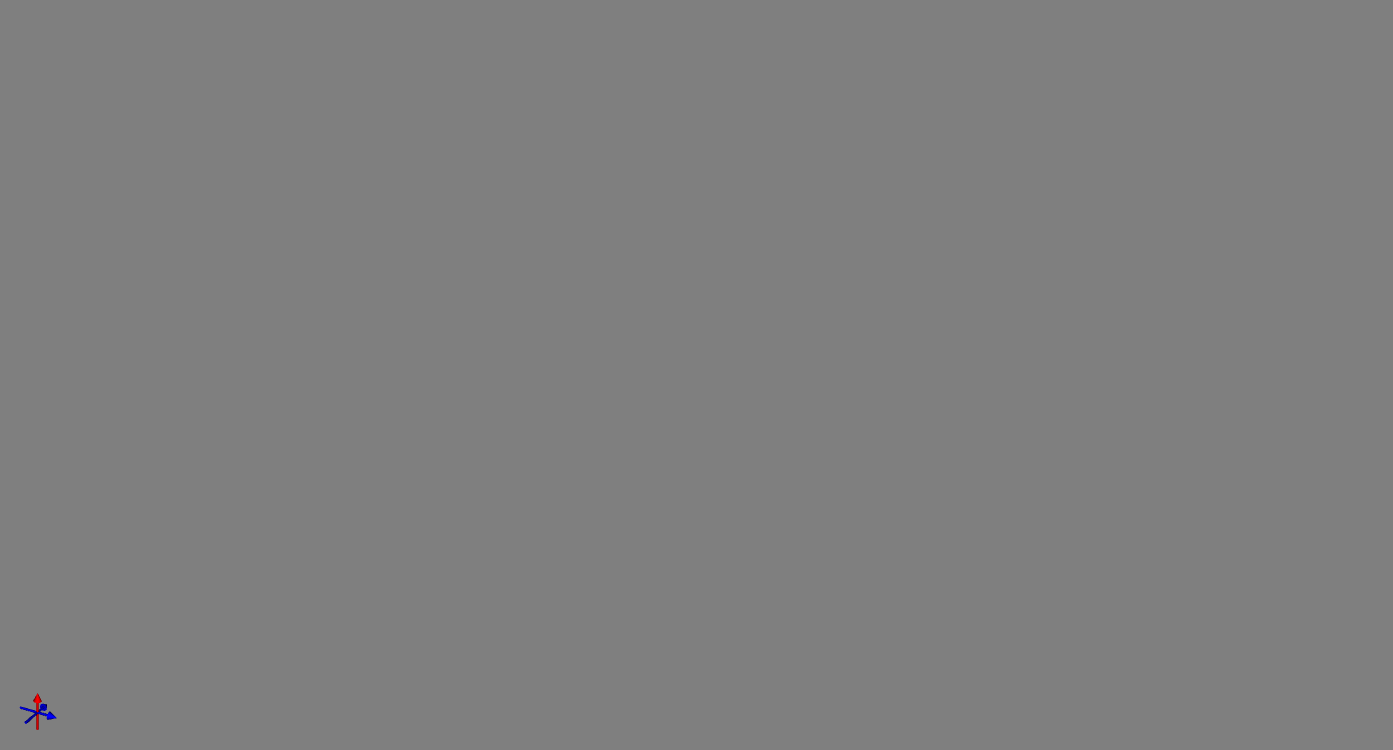

<IPython.core.display.Javascript object>

In [15]:
segthor_viewer = view(ct_image, label_image=seg_image)